<p style="background-color:green; font-family:calibri; color:white; font-size:250%; text-align:center; border-radius:15px 50px;">
    Project |  Credit Score Classification
</p>

<div style="border-radius:10px; padding: 15px; background-color: #d0f0fd; font-size:125%; text-align:left">

<h3 align="left" style="font-size:160%;"><font color=red>Problem:</font></h3>

Develop a robust machine learning model to accurately predict credit scores based on various financial and personal attributes. This model will automate the assessment of creditworthiness, enabling more efficient and data-driven decision-making in credit-related processes.

</div>


<div style="border-radius:10px; padding: 15px; background-color: #d0f0fd; font-size:125%; text-align:left">

<h3 align="left" style="font-size:160%;"><font color=red>Objective:</font></h3>

In this project, we explore a multiclass classification problem using a dataset containing diverse financial and personal attributes related to individuals’ credit profiles. The objective is to build robust predictive models to accurately classify individuals into credit score categories such as Poor, Fair, Good, and Excellent. By leveraging machine learning algorithms like Random Forest, XGBoost, and Logistic Regression, we aim to enhance the accuracy, efficiency, and consistency of creditworthiness assessment, ultimately supporting smarter and faster financial decision-making.

</div>


<div style="border-radius:10px; padding: 15px; background-color: #d0f0fd; font-size:115%; text-align:left;  color:black;">

<h3 align="left" style="font-size:180%; color:red;">Workflow:</h3>

* <b style="color:#0077b6;">Explore the Dataset</b>: Uncover patterns, distributions, and relationships within the data.  
* <b style="color:#0077b6;">Conduct Extensive Exploratory Data Analysis (EDA)</b>: Dive deep into bivariate relationships against the target.  
* <b style="color:#0077b6;">Preprocessing Steps</b>:
  - Remove irrelevant features  
  - Address missing values  
  - Treat outliers  
  - Encode categorical variables  
   
* <b style="color:#0077b6;">Model Building & Evaluation</b>:
  - Implement and tune classification models including Logistic Regression, Random Forest, XGBoost.  
  


</div>


## Import Libraries

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,precision_recall_curve,auc)
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

## Fetching data

In [79]:
df = pd.read_csv("train.csv",low_memory=False)

In [81]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Datatset Overview

In [82]:
df.shape

(100000, 28)

| **Variable**                  | **Description**                                                                 |
|------------------------------|---------------------------------------------------------------------------------|
| ID                           | Unique identifier for each record                                              |
| Customer_ID                  | Unique ID for each customer                                                    |
| Month                        | The month of the record                                                        |
| Name                         | Full name of the customer                                                      |
| Age                          | Age of the customer                                                            |
| SSN                          | Social Security Number (personal identifier)                                   |
| Occupation                   | Type of job/occupation of the customer                                         |
| Annual_Income                | Total income earned in a year                                                  |
| Monthly_Inhand_Salary        | Net monthly income after deductions                                            |
| Num_Bank_Accounts            | Number of bank accounts held                                                   |
| Num_Credit_Card              | Number of credit cards held                                                    |
| Interest_Rate                | Interest rate applicable on the credit                                         |
| Num_of_Loan                  | Total number of loans taken                                                    |
| Type_of_Loan                 | Types of loans taken (e.g., Home, Auto, Personal)                              |
| Delay_from_due_date          | Days delayed in payment from due date                                          |
| Num_of_Delayed_Payment       | Total number of delayed payments                                               |
| Changed_Credit_Limit         | Amount by which the credit limit was changed                                   |
| Num_Credit_Inquiries         | Number of times credit history was checked (e.g., for loans/cards)             |
| Credit_Mix                   | Mix of different types of credit (Good/Standard/Bad)                           |
| Outstanding_Debt             | Unpaid or pending debt amount                                                  |
| Credit_Utilization_Ratio     | Ratio of used credit limit to total credit limit                               |
| Credit_History_Age           | Age of the credit history in years/months                                      |
| Payment_of_Min_Amount        | Whether the minimum payment was made (Yes/No)                                  |
| Total_EMI_per_month          | Sum of EMIs to be paid monthly                                                 |
| Amount_invested_monthly      | Amount invested each month                                                     |
| Payment_Behaviour            | Behavioral pattern of payment (e.g., regular, irregular)                       |
| Monthly_Balance              | Remaining balance at the end of the month                                      |
| Credit_Score                 | Credit score of the customer (e.g., Good, Standard, Poor)                      |


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [84]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [85]:
df.duplicated().sum()

0

## EDA

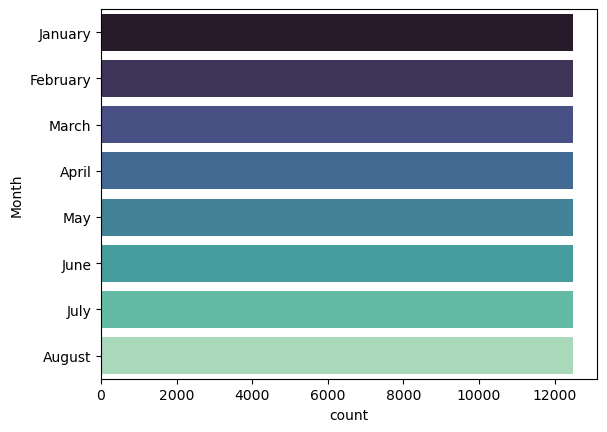

In [86]:
sns.countplot(df['Month'],palette="mako");

- Data distribution across months from January to August appears to be uniform, with each month having around 12,000 entries.  
- This suggests consistent data collection or customer activity throughout the first eight months of the year.

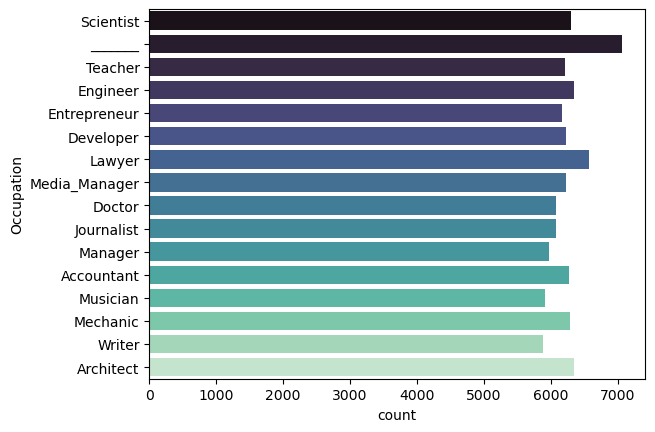

In [87]:
sns.countplot(df['Occupation'],palette="mako");

- Occupation distribution shows a fairly balanced spread, with the highest count for unspecified occupations and the lowest for Architects.  
- Lawyer, Developer, and Engineer are among the more represented professions, suggesting they form a significant part of the dataset.

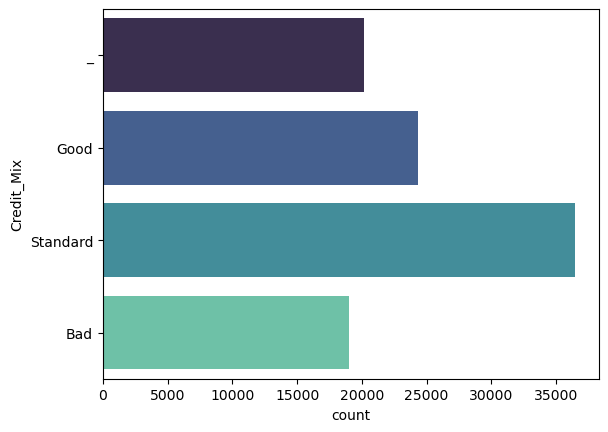

In [88]:
sns.countplot(df['Credit_Mix'],palette="mako");


- Most customers fall under the "Standard" credit mix category, indicating a typical mix of credit types is common in the dataset.  
- A significant number of entries have missing (`_`) credit mix information, which could impact analysis and should be handled appropriately.

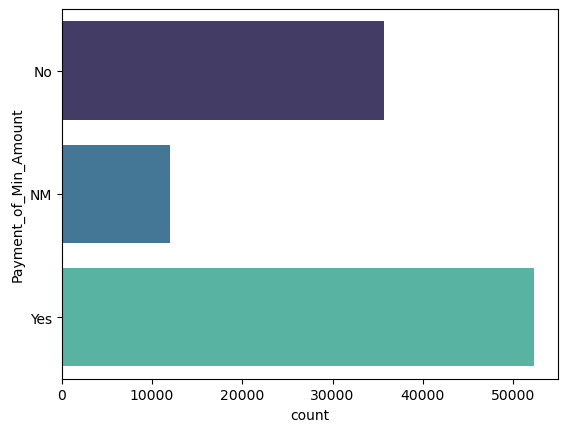

In [89]:
sns.countplot(df['Payment_of_Min_Amount'],palette="mako");

- The majority of customers made the minimum payment ("Yes"), showing a tendency to at least meet basic credit obligations.  
- A notable portion either didn't make the minimum payment ("No") or have missing values ("NM"), which could indicate potential credit risk or data issues.

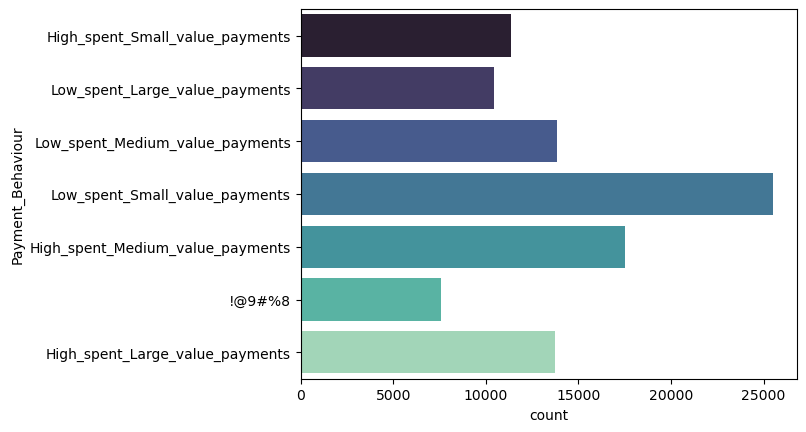

In [90]:
sns.countplot(df['Payment_Behaviour'],palette="mako");

- Most customers fall under "Low_spent_Small_value_payments," indicating generally conservative spending and payment behavior.  
- Some records contain invalid or noisy data (e.g., "!@9#%8"), which should be cleaned for accurate analysis.

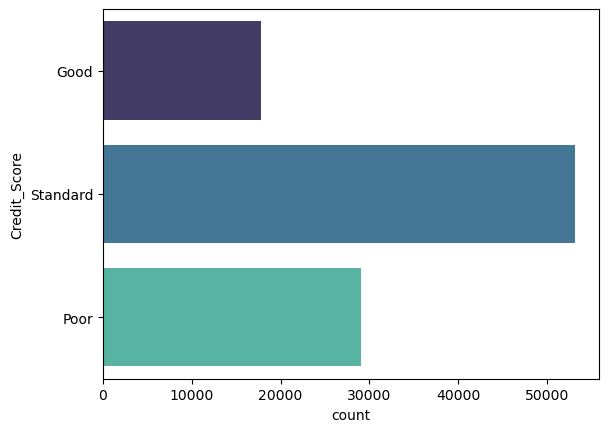

In [91]:
sns.countplot(df['Credit_Score'],palette="mako");

- Most customers have a **Standard** credit score, while **Good** credit scores are the least common.  
- A significant portion also falls under the **Poor** category, highlighting room for credit improvement in a large segment.

In [92]:
df['Credit_Score'].value_counts(normalize=True)

Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

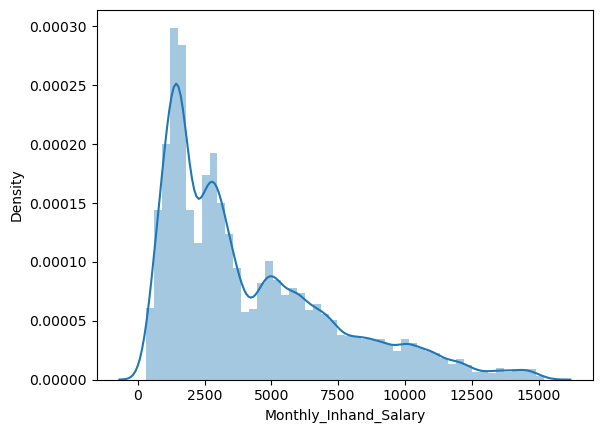

In [93]:
sns.distplot(df['Monthly_Inhand_Salary']);

- The distribution of Monthly Inhand Salary is right-skewed, indicating most customers earn lower salaries.  
- A few individuals earn significantly higher salaries, suggesting the presence of outliers or high-income customers.

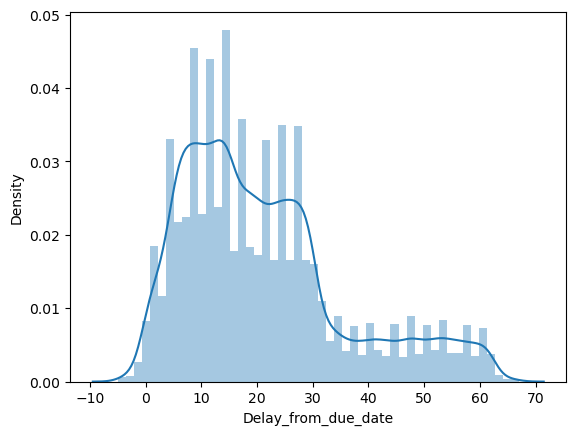

In [94]:
sns.distplot(df['Delay_from_due_date']);

- Most payments are delayed between 5 to 30 days, indicating a common tendency toward moderate payment delays.  
- There are a few extreme cases with delays up to 70 days, suggesting potential chronic defaulters.

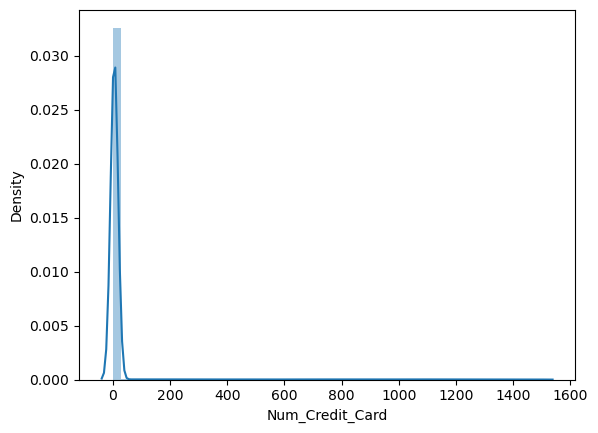

In [95]:
sns.distplot(df['Num_Credit_Card']);

- The number of credit cards is heavily concentrated between 0 and 50, indicating most individuals hold a limited number of cards.  
- A few outliers exist with extremely high card counts, possibly indicating data entry errors or unique financial behaviors.

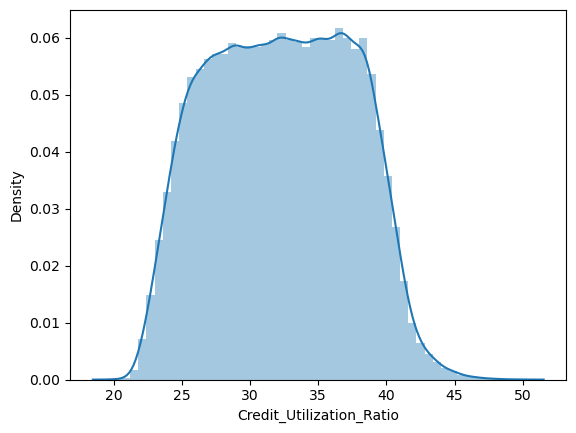

In [96]:
sns.distplot(df['Credit_Utilization_Ratio']);

- The distribution of the Credit Utilization Ratio appears roughly uniform between 25% and 38%.  
- The peak density is centered around 32–35%, indicating many individuals use about one-third of their credit limit.  
- The sharp drop-offs on either side suggest boundaries in credit behavior or imposed limits.

In [97]:
df['Type_of_Loan'].value_counts().head(10)

Type_of_Loan
Not Specified                      1408
Credit-Builder Loan                1280
Personal Loan                      1272
Debt Consolidation Loan            1264
Student Loan                       1240
Payday Loan                        1200
Mortgage Loan                      1176
Auto Loan                          1152
Home Equity Loan                   1136
Personal Loan, and Student Loan     320
Name: count, dtype: int64

#### Identify issues

ID, Name and SSN (Not useful)  

Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance Numerical but show as catogery (need to be fixed)

Occupation, CreditMix has value "__"  

Data contains outliers  

Num_Credit_Card has zeros 

Type_of_Loan Need to rewrite as 8 columns  

Num_Bank_Accounts contains negative values  

Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' (needs Feature Engineering)  

Target Columns is Imbalanced 

A lot of missing data  

## Data cleaning

#### Removing unuseful Columns (Uniques)

In [98]:
df.drop(['ID', 'Name', 'SSN'], axis=1, inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      100000 non-null  ob

### Fixing Numerical Columns

1. replace   _

2. convert into float

In [100]:
N_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
            'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

In [101]:
def fix_nums(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.nan

In [102]:
for col in N_to_fix :
    df[col] = df[col].apply(fix_nums)

It cleans numeric columns by removing underscores and converting values to float, setting invalid entries as NaN.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   float64
 13  Changed_Credit_Limit      97909 non-null   fl

Text(0.5, 1.0, 'Pairwise correlation of all columns in the dataframe')

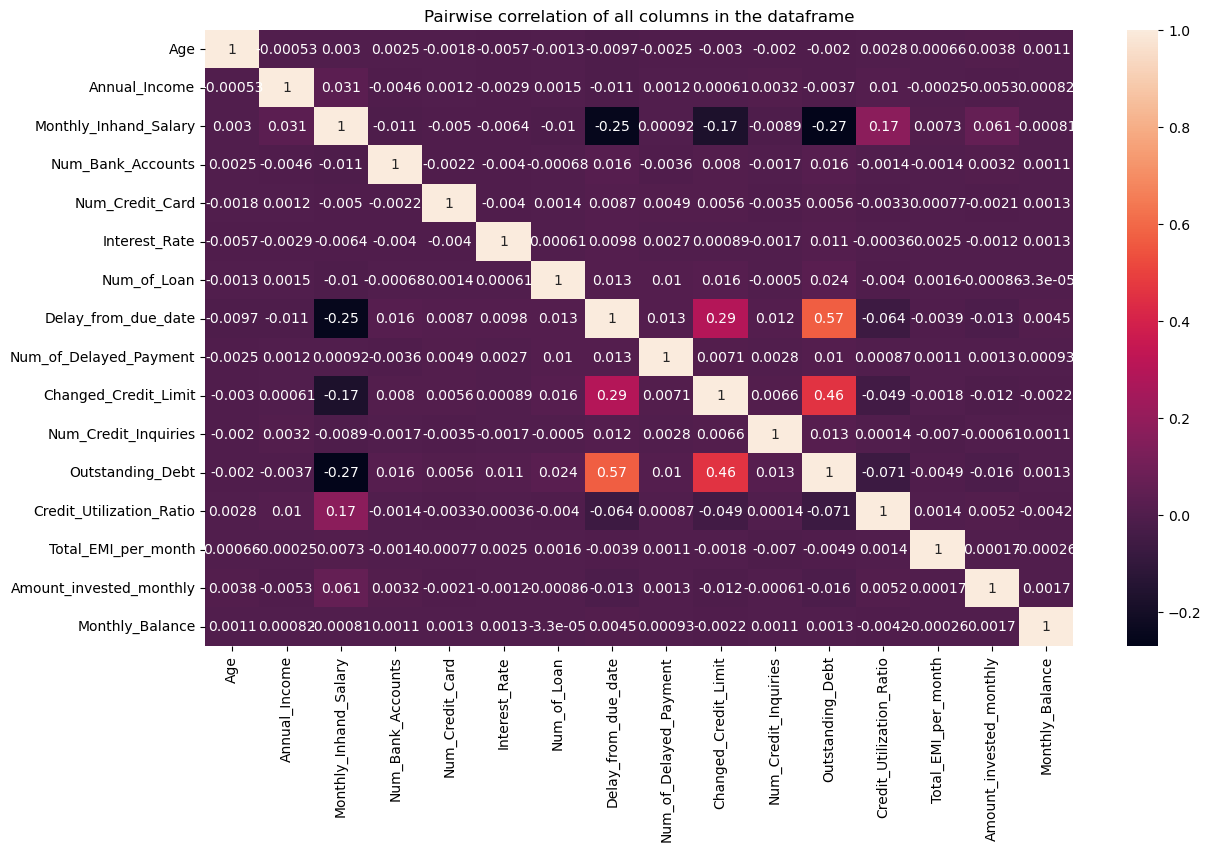

In [104]:
plt.figure(figsize=(14,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title("Pairwise correlation of all columns in the dataframe")

The strongest positive correlation is between Outstanding_Debt and Delay_from_due_date (0.57), suggesting that higher debt is associated with more payment delays.

### Type_of_Loan

In [105]:
## Rebuild Type of loans Columns 
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

It transforms the Type_of_Loan column into multiple boolean columns for each loan type (except the most common one), then deletes the original column.

### Num_Bank_Accounts

In [106]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

It ensures all values in the Num_Bank_Accounts column are non-negative by converting negatives to positives.

### Num_Credit_Card

In [107]:
df['Num_Credit_Card'].replace(0,1,inplace=True)

It replaces all 0 values in the Num_Credit_Card column with 1.

### Credit_History_Age

In [108]:
import re

def history_age_to_months(age):
    try:
        # Ensure it's a string and lowercase for consistent matching
        age = str(age).lower().strip()
        numbers = re.findall(r'\d+', age)
        if len(numbers) >= 2:
            years = int(numbers[0])
            months = int(numbers[1])
            return years * 12 + months
    except:
        pass
    return np.nan

In [109]:
# Apply to the column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(history_age_to_months)

It converts the Credit_History_Age column from string format (like '2 Years 5 Months') to a total number of months.

### Payment_of_Min_Amount

In [110]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

It replaces all occurrences of "NM" with "No" in the Payment_of_Min_Amount column to standardize the data.

In [111]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     47674
Name: count, dtype: int64

### Payment_Behaviour

In [112]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

It replaces the invalid value "!@9#%8" in the Payment_Behaviour column with NaN to handle dirty or corrupted data.

In [113]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

### Occupation

In [114]:
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [115]:
occs = df['Occupation'].value_counts().index[1:]
occs

Index(['Lawyer', 'Architect', 'Engineer', 'Scientist', 'Mechanic',
       'Accountant', 'Developer', 'Media_Manager', 'Teacher', 'Entrepreneur',
       'Doctor', 'Journalist', 'Manager', 'Musician', 'Writer'],
      dtype='object', name='Occupation')

In [116]:
id_ = "CUS_0xb891"
oc = df[df['Customer_ID'] == id_]['Occupation'].mode()[0]
df[df['Customer_ID'] == id_].replace("_______",oc)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
24,CUS_0xb891,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,433.604773,Standard,False,False,False,False,False,False,False,False
25,CUS_0xb891,February,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,409.951812,Standard,False,False,False,False,False,False,False,False
26,CUS_0xb891,March,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,411.427123,Standard,False,False,False,False,False,False,False,False
27,CUS_0xb891,April,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,262.499594,Standard,False,False,False,False,False,False,False,False
28,CUS_0xb891,May,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,359.374916,Standard,False,False,False,False,False,False,False,False
29,CUS_0xb891,June,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,419.880784,Standard,False,False,False,False,False,False,False,False
30,CUS_0xb891,July,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,443.549957,Standard,False,False,False,False,False,False,False,False
31,CUS_0xb891,August,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,...,379.216381,Standard,False,False,False,False,False,False,False,False


In [117]:
for ID in df[df['Occupation'] == "_______"]['Customer_ID'] : 
    oc = df[df['Customer_ID'] == ID]['Occupation'].mode()[0]
    df[df['Customer_ID'] == ID] = df[df['Customer_ID'] == ID].replace("_______",oc)

It fills missing occupation entries (represented by "_______") using the most frequent (mode) occupation for each customer based on their Customer_ID.
This ensures consistent occupation data within each customer’s records.

In [118]:
df['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
_______             5
Name: count, dtype: int64

### Credit_Mix

In [119]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [120]:
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

In [121]:
df['Credit_Mix'] = df['Credit_Mix'].map(m)

It maps credit mix categories to numerical values for modeling, replacing "Bad", "Standard", and "Good" with 0, 1, and 2, and missing values ("_") with NaN.

#### Converting Boolean Loan Type Columns to Float for Numerical Analysis

In [122]:
# Edit Columns from bool to int 
for col in list(df.columns[-8:]):
    df[col] = df[col].astype(float)

It converts the last 8 columns in the DataFrame from boolean to float type for numerical processing or modeling.

In [123]:
IDs = 1 
for ID in df['Customer_ID'].unique() :
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1 

It replaces each unique Customer_ID with a sequential integer, effectively encoding customer identifiers numerically.

 ### Imputing Missing Numerical Data Using KNN (k=1)

In [124]:
from sklearn.impute import KNNImputer

# Select only numerical feature columns (excluding 'Customer_ID')
num_cols = [col for col in df.select_dtypes(exclude='object').columns if col != 'Customer_ID']

# Fit and transform all numerical features together
imputer = KNNImputer(n_neighbors=1)
df[num_cols] = imputer.fit_transform(df[num_cols])

It imputes missing values in all numerical columns (except Customer_ID) using the K-Nearest Neighbors method with k=1, filling each missing value with the value from its closest complete neighbor.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

### Imputing Missing Categorical Values with Most Frequent Strategy

In [126]:
from sklearn.impute import SimpleImputer

In [127]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])

It fills missing values in the Payment_Behaviour column using the most frequently occurring (mode) value.

### Outlier Detection and Treatment Using Median Replacement

In [128]:
from datasist.structdata import detect_outliers

In [129]:
## replace Outliers with median 
for col in num_cols :
    outliers_indecies = detect_outliers(df,0,[col])
    median = df[col].median()
    df[col].iloc[outliers_indecies] = median

It identifies outliers in each numerical column using the datasist library and replaces them with the median to minimize skew caused by extreme values.

## Data Preprocessing

Handling Catogerical

In [130]:
df.select_dtypes(include="object")

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,No,High_spent_Small_value_payments,Good
1,February,Scientist,No,Low_spent_Large_value_payments,Good
2,March,Scientist,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,No,Low_spent_Small_value_payments,Good
4,May,Scientist,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,April,Mechanic,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,No,Low_spent_Large_value_payments,Standard


In [131]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [132]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [133]:
df['Credit_Score'] = df['Credit_Score'].map(m)

It encodes the Credit_Score categories into numeric values (Poor → 0, Standard → 1, Good → 2) for modeling purposes.

In [134]:
del df['Customer_ID']  ## removing customer_id column

### Label Encoding of Categorical Features for Model Compatibility

In [135]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply label encoding only to categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = le.fit_transform(df[col])


It label-encodes all categorical columns in the DataFrame, converting text labels into numeric form for machine learning models.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

In [137]:
df.to_csv(r"C:\Users\DELL\Desktop\credit score classification project\original\Preprocessed_Data.csv", index=False)


In [139]:
df = pd.read_csv("Preprocessed_Data.csv",low_memory=False)

### Spliting data into X, y & Resampling Data

In [140]:
# define dataset
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"]

In [141]:
y.value_counts(normalize=True)

Credit_Score
1    0.53174
0    0.28998
2    0.17828
Name: proportion, dtype: float64

### Class Balancing with Random Oversampling Technique

In [142]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
rus = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Fit and resample
X_data_rus, y_data_rus = rus.fit_resample(X, y)


It uses RandomOverSampler to balance class distribution by randomly duplicating minority class samples.

In [143]:
y_data_rus.value_counts(normalize=True)

Credit_Score
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64

#### Train Test Split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.2, random_state=42,stratify=y_data_rus)

In [146]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (127617, 30)
y_train shape: (127617,)
X_test shape: (31905, 30)
y_test shape: (31905,)


#### Handling Numerical

Using Power transformer to avoid Data Skewness

In [147]:
from sklearn.preprocessing import PowerTransformer

In [148]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [149]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

It applies the Yeo-Johnson power transformation to normalize the training and testing data, making them more Gaussian-like and improving model performance.

# Modeling and Evaluation

## Logistic Regression

In [151]:
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2','14'],  # 'l1' can be used with solver='liblinear' or 'saga'
    'solver': ['lbfgs'],  # Suitable for l2 penalty
    'max_iter': [100, 200, 300]
}
# Initialize the model
lr = LogisticRegression(random_state=42)

# GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr,
                              cv=3, n_jobs=-1, verbose=1, scoring='f1_macro')
# Fit
grid_search_lr.fit(X_train, y_train)
# Best model
best_lr = grid_search_lr.best_estimator_
print("Best Parameters (LogReg):", grid_search_lr.best_params_)

# Evaluation
y_pred_lr = best_lr.predict(X_test)
print("LogReg Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LogReg Precision:", precision_score(y_test, y_pred_lr, average='macro'))
print("LogReg Recall:", recall_score(y_test, y_pred_lr, average='macro'))
print("LogReg F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters (LogReg): {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
LogReg Accuracy: 0.6916784203102961
LogReg Precision: 0.6900496457332178
LogReg Recall: 0.6916784203102962
LogReg F1 Score: 0.6880218423833854


In [162]:
# Generate classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71     10635
           1       0.66      0.56      0.60     10635
           2       0.69      0.81      0.75     10635

    accuracy                           0.69     31905
   macro avg       0.69      0.69      0.69     31905
weighted avg       0.69      0.69      0.69     31905



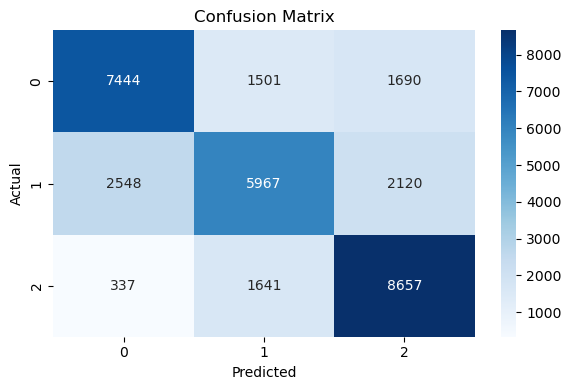

In [153]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## XGBoost Classifier

In [154]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Setup GridSearchCV
grid_search_xg = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='f1_macro', cv=3, n_jobs=-1, verbose=1)
# Fit the model
grid_search_xg.fit(X_train, y_train)

# Best estimator from grid search
best_xgb = grid_search_xg.best_estimator_
print("Best Parameters :", grid_search_xg.best_params_)

# Predict on the test set
y_pred_xg = best_xgb.predict(X_test)

# Evaluate the tuned model
print("Tuned XGBoost Evaluation Metrics:")
print(f"Accuracy : {accuracy_score(y_test, y_pred_xg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xg, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_xg, average='macro'):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_xg, average='macro'):.4f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters : {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost Evaluation Metrics:
Accuracy : 0.8784
Precision: 0.8799
Recall   : 0.8784
F1 Score : 0.8753


In [163]:
# Generate classification report
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10635
           1       0.90      0.73      0.81     10635
           2       0.88      0.96      0.92     10635

    accuracy                           0.88     31905
   macro avg       0.88      0.88      0.88     31905
weighted avg       0.88      0.88      0.88     31905



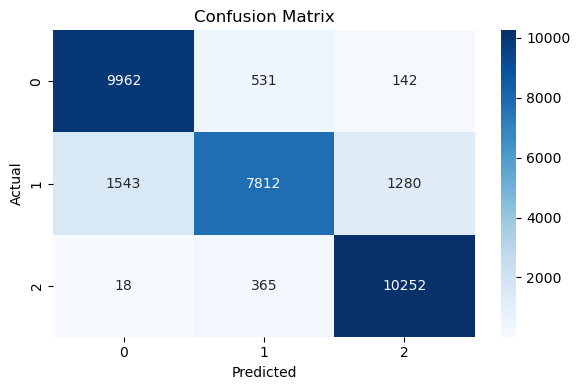

In [156]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xg)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Random Forest Classifier

In [157]:
# Extended parameter grid
param_grid = {
    'n_estimators': [300,400],               # Number of trees
    'max_depth': [None, 10,],          # Maximum depth of each tree
    'min_samples_split': [2,3 ],          # Min samples required to split a node
    'min_samples_leaf': [1, 2],            # Min samples required at each leaf
    'max_features': ['auto', 'sqrt'], # Number of features to consider at each split
                   
}
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1,
                           scoring='f1_macro')
# Fit the grid search
grid_search_rf.fit(X_train, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)

# Evaluate the model
y_pred_rf = best_rf.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400}
Accuracy : 0.9137
Precision: 0.9180
Recall   : 0.9137
F1 Score : 0.9113


In [161]:
# Generate classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     10635
           1       0.96      0.78      0.86     10635
           2       0.92      0.98      0.95     10635

    accuracy                           0.91     31905
   macro avg       0.92      0.91      0.91     31905
weighted avg       0.92      0.91      0.91     31905



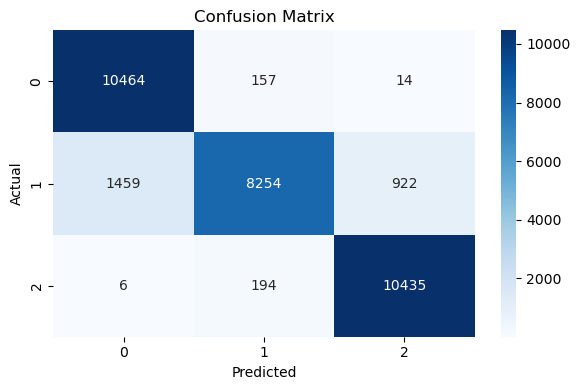

In [159]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## ROC Curve Compare

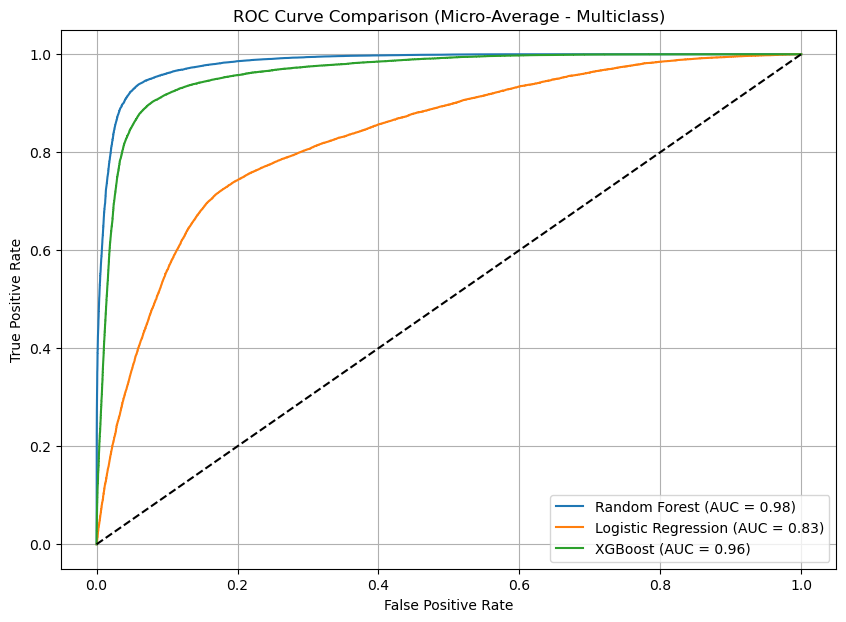

In [164]:
from sklearn.preprocessing import label_binarize

# Binarize the output
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Get predicted probabilities
rf_probs = best_rf.predict_proba(X_test)
lr_probs = best_lr.predict_proba(X_test)
xgb_probs = best_xgb.predict_proba(X_test)

# Compute micro-average ROC curve and ROC area
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
fpr_lr, tpr_lr, _ = roc_curve(y_test_bin.ravel(), lr_probs.ravel())
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin.ravel(), xgb_probs.ravel())

auc_rf = auc(fpr_rf, tpr_rf)
auc_lr = auc(fpr_lr, tpr_lr)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Aesthetic settings
plt.title('ROC Curve Comparison (Micro-Average - Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Random Forest stands out with the highest AUC of 0.98, showcasing exceptional classification accuracy and the ability to clearly distinguish between classes.

XGBoost follows closely with an AUC of 0.96, indicating strong predictive power and reliable performance across categories.

Logistic Regression lags behind with an AUC of 0.83, suggesting decent but comparatively lower discriminative capability than the ensemble-based models.


<a id="import"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Final Conclusion</p>


 ## Conclusion
Performed machine learning model to classify credit scores (Poor, Standard, Good) using financial and personal data. After cleaning, preprocessing, and handling class imbalance, you trained Logistic Regression, Random Forest, and XGBoost models.

Best Model: Random Forest (AUC: 0.98)

XGBoost AUC: 0.96

Logistic Regression AUC: 0.83

Random Forest stands out with the highest AUC of 0.98, showcasing exceptional classification accuracy and the ability to clearly distinguish between classes.

## Suggestions

Visualize feature importance

Build a pipeline for cleaner workflows